# 1주차 리포트 공지  
```
1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.

(SVM, LR, RF, DT, KNN)

2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.



https://github.com/MyungKyuYi/AI-class 1번~4번 예제 참조

해당 소스는 github에 올리고, 본인 소스를 완벽하게 이해할 것, 추후 실시 시험을 통한 평가예정
```

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy import stats  # 과학용 계산 라이브러리
from tensorflow import keras
from sklearn.model_selection import train_test_split

# data load
file_path = './diabetes.csv' # 당뇨병 데이터

In [3]:
data = pd.read_csv(file_path, header = 0)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- 변수명 설명

임신(Pregnancies): 환자가 임신한 횟수. 이는 임신이 호르몬 수치에 영향을 주어 포도당 대사에 영향을 미칠 수 있기 때문에 관련이 있습니다.

포도당(Glucose): 경구당부하검사에서 2시간 후 혈장 포도당 농도. 이는 혈당 수치를 조절하는 신체의 능력을 측정합니다.

혈압(BloodPressure): 확장기 혈압(mmHg). 이는 심장이 쉬고 있을 때 박동 사이의 동맥 압력을 나타냅니다.

피부두께(SkinThickness): 삼두근 피부주름 두께(mm). 체지방 측정 수치입니다. 피부 주름이 두꺼울수록 체지방 수치가 더 높다는 것을 의미하는 경우가 많습니다.

인슐린(Insulin): 2시간 혈청 인슐린(mu U/ml). 이는 포도당 섭취 후 췌장이 생산하는 인슐린의 양을 반영하며, 이는 포도당 대사에 중요합니다.

BMI: 체질량 지수(체중(kg)/(키(m))^2). BMI는 키와 몸무게를 기준으로 체지방을 측정한 수치입니다.

당뇨병 혈통 기능(DiabetesPedigreeFunction): 가족력을 바탕으로 당뇨병 발병 가능성을 점수화하는 기능입니다. 이는 유전적 소인과 환경적 요인 모두의 영향을 통합합니다.

나이:환자의 나이(세). 당뇨병의 위험은 일반적으로 사람들이 나이가 들수록 증가하므로 나이는 중요한 요소입니다.

결과: 환자의 당뇨병 여부를 나타내는 이진 변수(1 = 당뇨병, 0 = 비당뇨병).

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.isnull().sum() # 깔끔한 데이터네요

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.columns # 칼럼명을 보여줍니다. drop으로 쓸것만 남기는 것도 좋겠네요

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

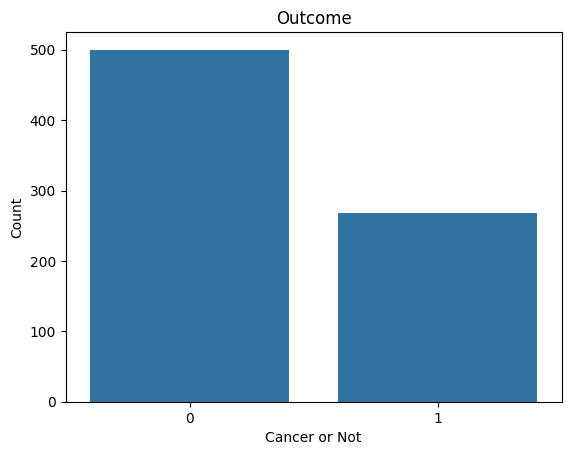

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = data, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [8]:
# 레이블 갯수 확인 (숫자)
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

768명의 환자 중, 당뇨병환자 268명과 비당뇨병환자 500명이다!

In [9]:
# 결측치 제거
# data = data.dropna()
# data.isnull().sum() # 위에서 결측치가 없었기에, 할 필욘 없긴함.

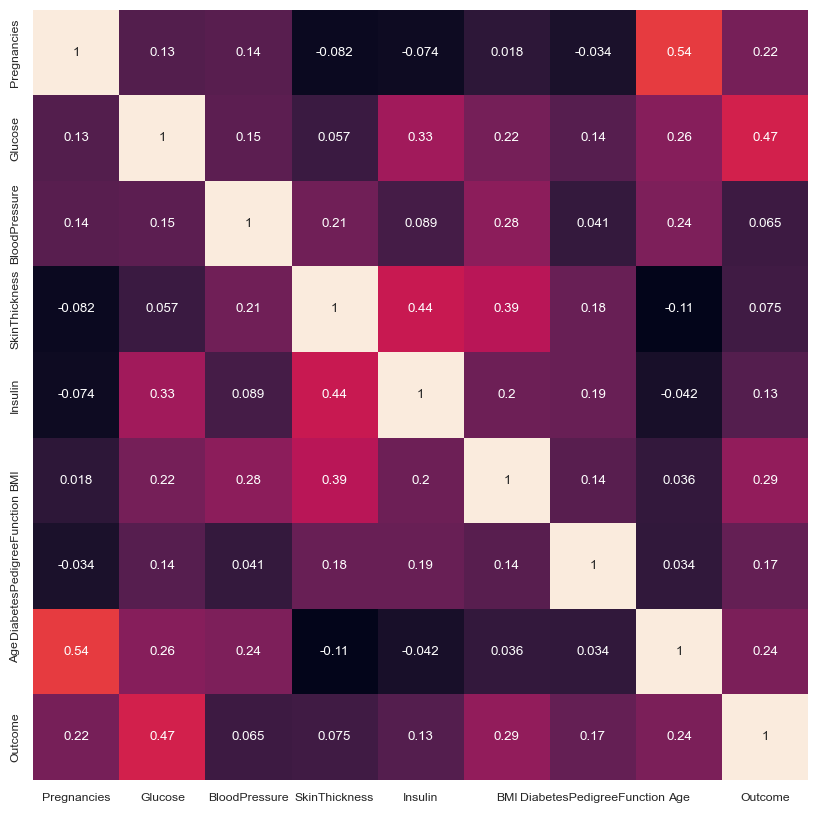

In [10]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Outcome과 높은 것은 포도당(0.47)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = data.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y = data['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [14]:
X = data.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [15]:
# DL을 위한 Numpy 적용
X = X.values
X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [17]:
# one-hot encoding
# Y = pd.get_dummies(y).values
# 이 과정에선 안해도 될 듯 하다.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.35,
                                                  shuffle=True,
                                                  random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(499, 8) (499,)
(269, 8) (269,)


In [28]:
y_train

439    36.8
643    28.0
104    39.6
114    30.5
749    24.3
       ... 
71     28.6
106    22.4
270    45.6
435    42.4
102    22.5
Name: BMI, Length: 499, dtype: float64

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(499, 8) (499,)
(269, 8) (269,)


# MODEL
- 3번, BMI 예측 회귀 모델

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 51.788460726301615
평균제곱근오차 51.788460726301615
평균제곱근오차 51.78846072630167


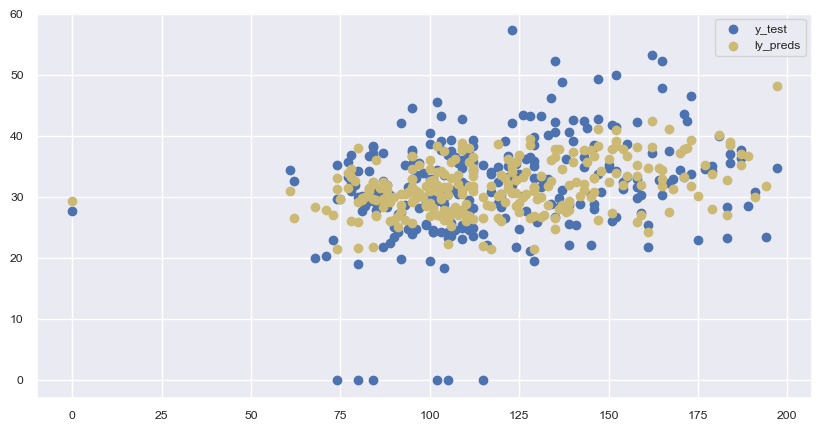

In [36]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 1], y_test, label='y_test')  # 1번 인덱스에 BMI가 있는 경우
plt.scatter(X_test[:, 1], ly_preds, c='y', label='ly_preds')
plt.legend()
plt.show()     

- 산점도보면 잘 된 것 같아요

## DT REGRESSION도 해봅시다

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 81.38278810408923


- DT에선 과적합발생한 것 같음. 살짝 수정해봅시당

In [51]:
model = DecisionTreeRegressor(max_depth=5)  # 예시로 max_depth 제한을 둠
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 60.921709971887736


- 하이퍼파라미터 살짝 수정하니 좀 나아짐. 그래도 별로에용

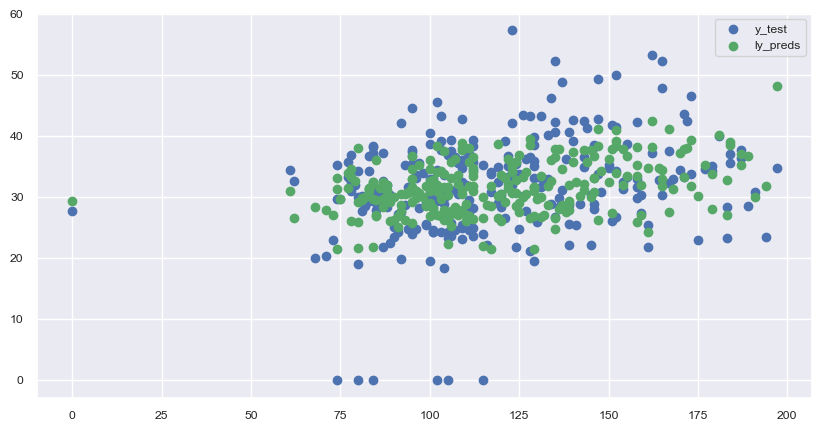

In [52]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 1], y_test, label='y_test')  # 1번 인덱스에 BMI가 있는 경우
plt.scatter(X_test[:, 1], ly_preds, c='g', label='ly_preds')
plt.legend()
plt.show()     

## RF REGRESSION도 해봅시다

In [54]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 49.331394215613415


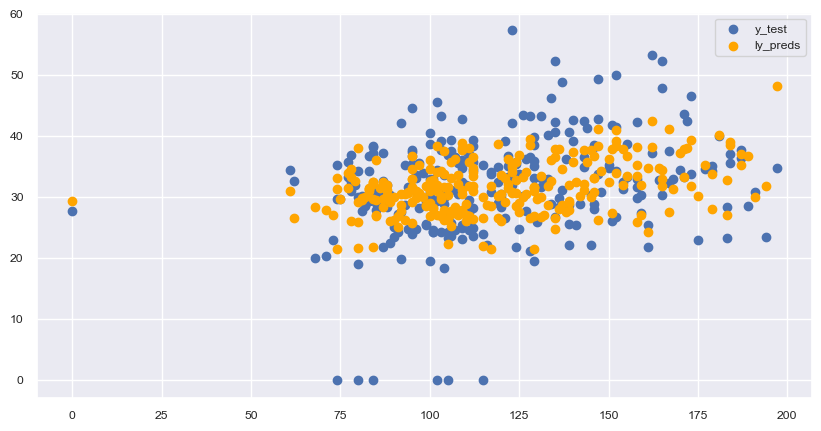

In [55]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 1], y_test, label='y_test')  # 1번 인덱스에 BMI가 있는 경우
plt.scatter(X_test[:, 1], ly_preds, c='orange', label='ly_preds')
plt.legend()
plt.show()     